Imports necesarios

In [11]:

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont


#leer csv's


In [17]:
pwd

'C:\\'

In [18]:
cd ..

C:\


In [19]:
cd E:\universidad\##proyecto semillero\TODOS DATOS\cleaned_data

E:\universidad\##proyecto semillero\TODOS DATOS\cleaned_data


In [20]:
data = pd.read_csv('Registro1402CLEANED.csv')
data

,TIPOINGRESO,GENERO,SEMESTRE,ICFES_PUNTAJE,ICFES_TIPO,DESERTOR,CIUDAD,ESTRATO_new
0,1.0,0.0,8.0,206.0,4,1,0.0,3.0
1,3.0,0.0,2.0,963.0,4,1,0.0,1.0
2,1.0,1.0,9.0,215.0,1,1,0.0,1.0
3,1.0,1.0,2.0,817.0,4,1,0.0,1.0
4,4.0,1.0,3.0,98.0,4,1,0.0,2.0
...,...,...,...,...,...,...,...,...
254,3.0,1.0,7.0,0.0,4,0,0.0,1.0
255,1.0,1.0,6.0,0.0,4,0,0.0,2.0
256,1.0,1.0,5.0,0.0,4,0,1.0,2.0
257,1.0,1.0,4.0,0.0,4,0,0.0,2.0


In [21]:
data.shape

(259, 8)

In [22]:
data.groupby('DESERTOR').size()

DESERTOR
0    226
1     33
dtype: int64

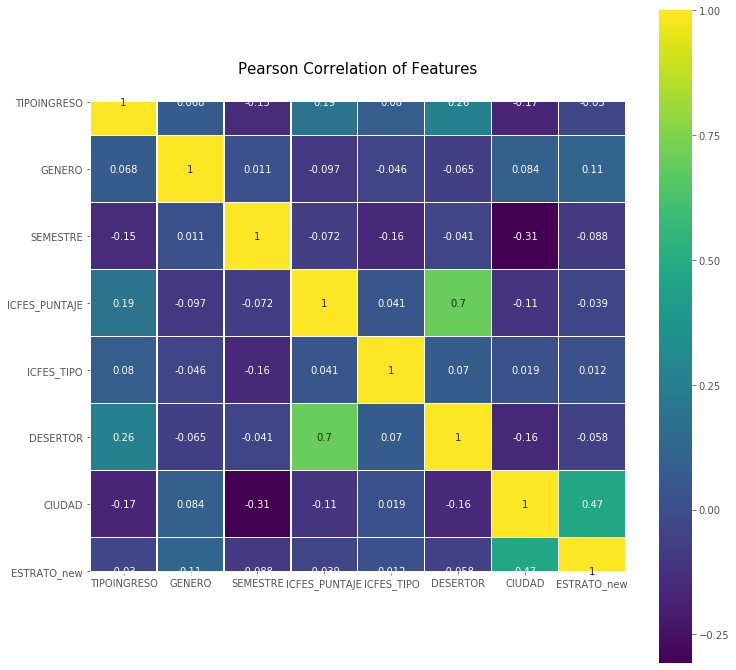

In [23]:
#variables relevantes

colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sb.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()

In [24]:
#buscamos profundidad del arbol
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(data))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={1:6.84})
    for train_fold, valid_fold in cv.split(data):
        f_train = data.loc[train_fold] 
        f_valid = data.loc[valid_fold] 

        model = tree_model.fit(X = f_train.drop(['DESERTOR'], axis=1), 
                               y = f_train["DESERTOR"]) 
        valid_acc = model.score(X = f_valid.drop(['DESERTOR'], axis=1), 
                                y = f_valid["DESERTOR"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))

 Max Depth  Average Accuracy
         1          0.976923
         2          0.926769
         3          0.926769
         4          0.922923
         5          0.922923
         6          0.922923
         7          0.922923
         8          0.922923


In [25]:
#CREACION DE ARBOL
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = data['DESERTOR']
x_train = data.drop(['DESERTOR'], axis=1).values 

# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='entropy',
                                            min_samples_split=20,
                                            min_samples_leaf=5,
                                            max_depth = 4,
                                            class_weight={1:6.84})
decision_tree.fit(x_train, y_train)

# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 7,
                              impurity = True,
                              feature_names = list(data.drop(['DESERTOR'], axis=1)),
                              class_names = ['No', 'Desertor'],
                              rounded = True,
                              filled= True )
        
# Convertir el archivo .dot a png para poder visualizarlo
#check_call(['dot','-Tpng','tree1.dot','-o','cleaned_data\tree1.png'])
#PImage("tree1.png")

In [26]:
#PRECISION DEL ARBOL
acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)
print(acc_decision_tree)

92.28


In [73]:
#TEST


list_test=[]

def funcionTest(TIPOINGRESO,GENERO,SEMESTRE,ICFES_PUNTAJE,ICFES_TIPO,DESERTOR,CIUDAD,ESTRATO_new):
    x_test = pd.DataFrame(columns=('TIPOINGRESO','GENERO','SEMESTRE','ICFES_PUNTAJE','ICFES_TIPO','DESERTOR','CIUDAD','ESTRATO_new'))
    x_test.loc[0] = (TIPOINGRESO,GENERO,SEMESTRE,ICFES_PUNTAJE,ICFES_TIPO,DESERTOR,CIUDAD,ESTRATO_new)
    y_pred = decision_tree.predict(x_test.drop(['DESERTOR'], axis = 1))
    y_proba = decision_tree.predict_proba(x_test.drop(['DESERTOR'], axis = 1))
    return str(y_pred)

list_test.append(funcionTest(1.0,0.0,8.0,206.0,4,1,0.0,3.0))
list_test.append(funcionTest(3.0,0.0,2.0,963.0,4,1,0.0,1.0))
list_test.append(funcionTest(1.0,1.0,9.0,215.0,1,1,0.0,1.0))
list_test.append(funcionTest(1.0,1.0,9.0,215.0,1,1,0.0,1.0))

list_test.append(funcionTest(1.0,1.0,4.0,0.0,4,0,1.0,4.0))
list_test.append(funcionTest(1.0,1.0,5.0,0.0,2,0,1.0,5.0))
list_test.append(funcionTest(1.0,1.0,4.0,0.0,4,0,1.0,4.0))
list_test.append(funcionTest(1.0,0.0,8.0,0.0,4,0,0.0,2.0))


lon = len(list_test)

df_test = pd.DataFrame(np.array(list_test).reshape(lon,1), columns = list("D"))
df_test.groupby('D').size()


D
[0]    4
[1]    4
dtype: int64